## Supervised learning for No-Show Prediction


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, precision_recall_curve,
    confusion_matrix, r2_score, mean_squared_error, classification_report
)

df = pd.read_csv('Data/dataset1.csv')
df.head(), df.shape

(      PatientId  AppointmentID Gender          ScheduledDay  \
 0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
 1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
 2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
 3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
 4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
 
          AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
 0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
 1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
 2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
 3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
 4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
 
    Diabetes  Alcoholism  Handcap  SMS_received No-show  
 0         0           0        0             0      No  
 1         0          

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

#Dropping unused columns
df_clean = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1)

df_clean['Gender'] = LabelEncoder().fit_transform(df_clean['Gender'])
df_clean['No-show'] = LabelEncoder().fit_transform(df_clean['No-show'])

#Split features and target'No Show'
X = df_clean.drop('No-show', axis=1)
y = df_clean['No-show']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

**1. Logistic Rgression**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.32      0.02      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.56      0.50      0.46     22106
weighted avg       0.70      0.80      0.71     22106



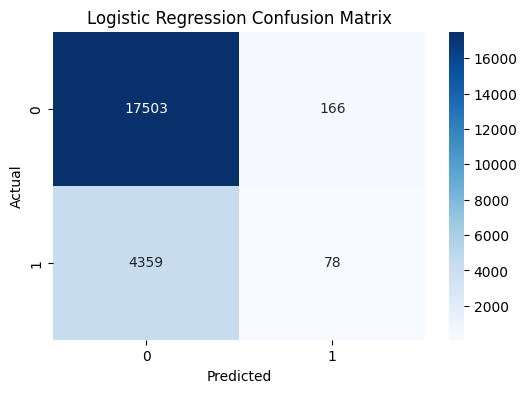

In [9]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

#confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

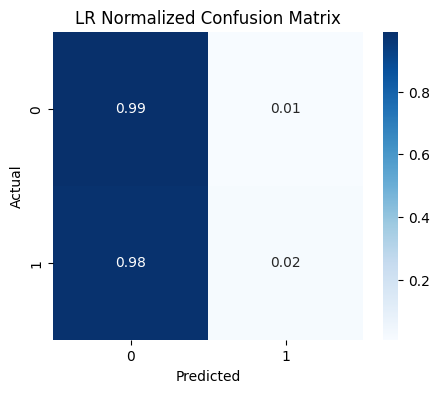

In [10]:
cm = confusion_matrix(y_test, y_pred_lr, normalize='true')
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('LR Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2.Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     17669
           1       0.35      0.20      0.26      4437

    accuracy                           0.77     22106
   macro avg       0.59      0.56      0.56     22106
weighted avg       0.73      0.77      0.74     22106



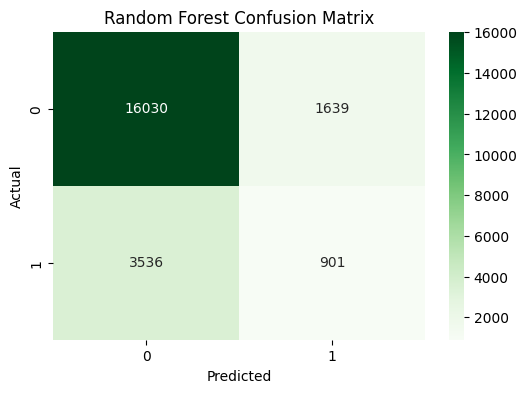

In [11]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBoost**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:25:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.46      0.03      0.06      4437

    accuracy                           0.80     22106
   macro avg       0.63      0.51      0.48     22106
weighted avg       0.73      0.80      0.72     22106



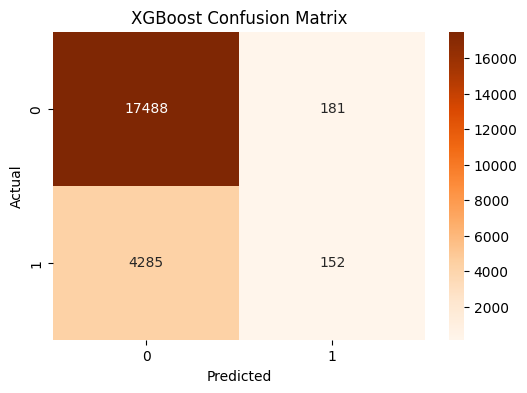

In [12]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print('XGBoost Classification Report:')
print(classification_report(y_test, y_pred_xgb))

#confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
#performance metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
preds = [y_pred_lr, y_pred_rf, y_pred_xgb]

metrics = []
for name, y_pred in zip(models, preds):
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

  

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.795304,0.319672,0.017579,0.033326
1,Random Forest,0.765901,0.354724,0.203065,0.258277
2,XGBoost,0.797973,0.456456,0.034257,0.063732


In [24]:
#Other performance metrics
preds = {
    'Logistic Regression': y_pred_lr,
    'Random Forest'      : y_pred_rf,
    'XGBoost'            : y_pred_xgb
}

print(f"{'Model':20} | {'R²':>6} | {'RMSE':>6}")
print("-"*36)
for name, y_pred in preds.items():
    r2   = r2_score(y_test, y_pred)
    mse  = mean_squared_error(y_test, y_pred)  
    rmse = np.sqrt(mse)                          
    print(f"{name:20} | {r2:6.4f} | {rmse:6.4f}")

Model                |     R² |   RMSE
------------------------------------
Logistic Regression  | -0.2759 | 0.4524
Random Forest        | -0.4592 | 0.4838
XGBoost              | -0.2593 | 0.4495


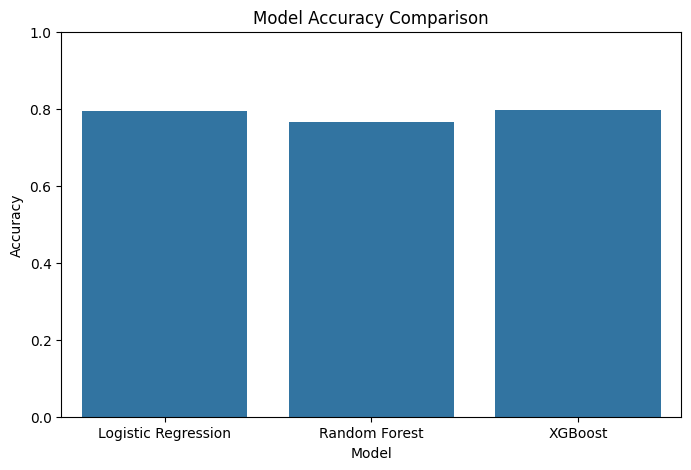

In [14]:
#accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

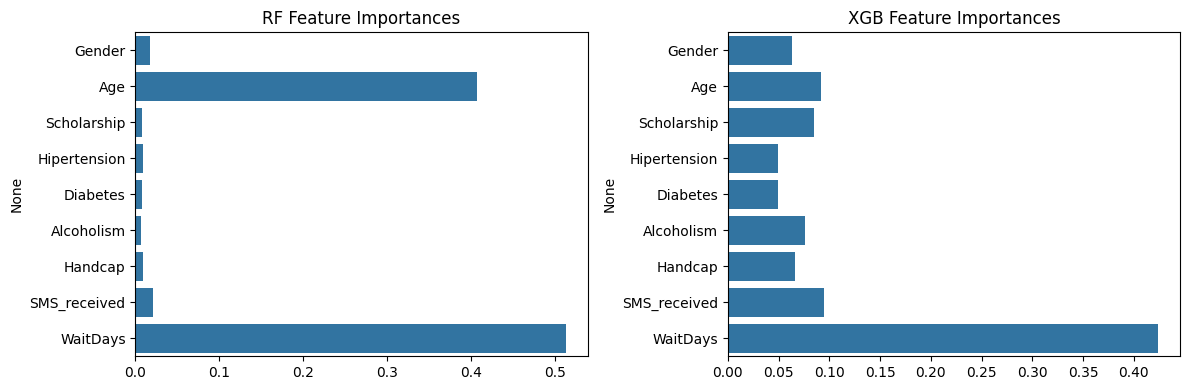

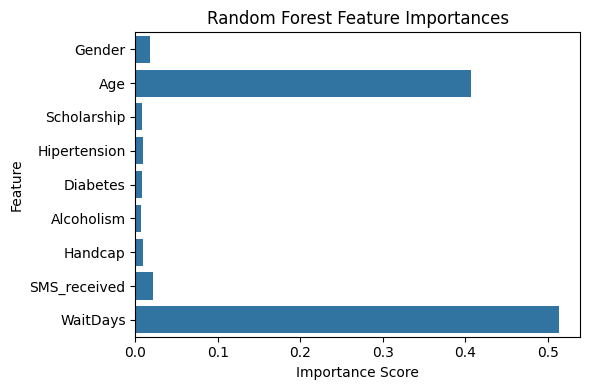

In [15]:
#Plotting feature importances
features = X.columns
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x=rf.feature_importances_, y=features, ax=axes[0])
axes[0].set_title('RF Feature Importances')
sns.barplot(x=xgb.feature_importances_, y=features, ax=axes[1])
axes[1].set_title('XGB Feature Importances')
plt.tight_layout()
plt.show()

#Ft Importance --> Random Forest
plt.figure(figsize=(6,4))
sns.barplot(x=rf.feature_importances_, y=features)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

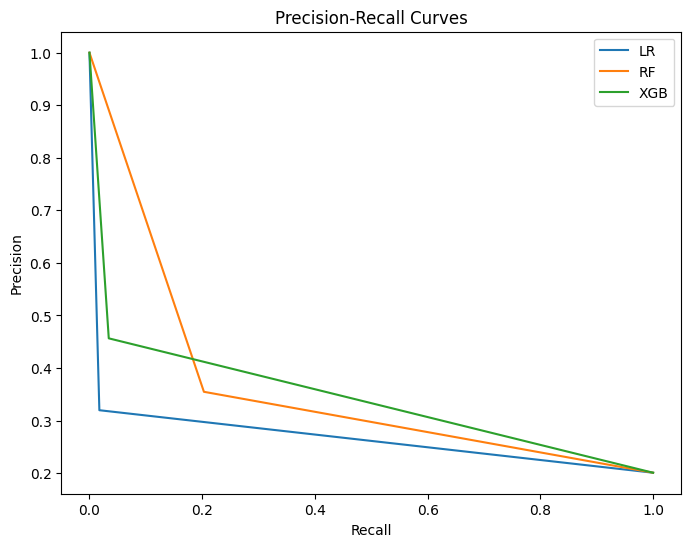

In [16]:
#Precission- Recall Curves
plt.figure(figsize=(8,6))
for name, proba in [('LR', y_pred_lr ), ('RF', y_pred_rf), ('XGB', y_pred_xgb)]:
    precision, recall, _ = precision_recall_curve(y_test, proba)
    plt.plot(recall, precision, label=name)
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()